The data points that I obtain in my core flooding experiments are very noisy, due to the fluctuations in the back pressure valve and the unsable nature of foam. I use `smooth` function of Matlab to make the data smoother mostly for a better visualization of the results. I missed this function in Julia, until I found [this](http://wiki.scipy.org/Cookbook/SignalSmooth) Python code that I could call from Julia thanks to [PyCall](https://github.com/stevengj/PyCall.jl) package. The code is quite simple. It mirrors the data at the begining and the end of the data array, and uses scipy's [convolution](http://en.wikipedia.org/wiki/Convolution) function, which is also available in Julia. For the [window functions](http://en.wikipedia.org/wiki/Window_function), I used the [DSP](https://github.com/JuliaDSP/DSP.jl) package. This is the smooth function:

In [6]:
function smooth(y, win_len=11, win_method=2)
# This function requires the DSP package to be installed
# 1: flat
# 2: hanning
# 3: hamming ...
if win_len%2==0
  win_len+=1 # only use odd numbers
end
if win_method == 1
  w=ones(win_len)
elseif win_method==2
  w=DSP.hanning(win_len)
elseif win_method==3
  w=DSP.hamming(win_len)
end

if win_len<3
  return y
elseif length(y)<win_len
  return y
else
        y_new = [2*y[1]-flipdim(y[1:win_len],1); y[:]; 2*y[end]-flipdim(y[end-win_len:end],1)]
  y_smooth = conv(y_new, w/sum(w))
  ind = floor(Int, 1.5*win_len)
  return y_smooth[1+ind:end-ind-1]
end

end # end of function

smooth (generic function with 3 methods)

To use this package, we need to have the [DSP](https://github.com/JuliaDSP/DSP.jl) package installed. Let's try the function here:

In [2]:
using DSP, PyPlot;

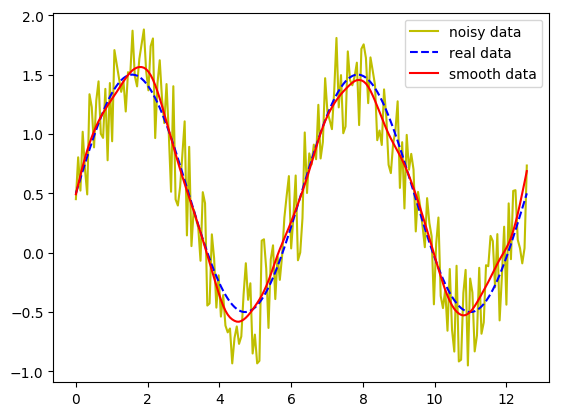

In [8]:
x=linspace(0,4π,200)
y_real=0.5+sin.(x)
y_noisy=sin.(x)+rand(size(x))
y_smooth=smooth(y_noisy, 25)
plot(x,y_noisy, "y", x, y_real, "b--", x, y_smooth, "r")
legend(["noisy data", "real data", "smooth data"]);

Due to laziness, I've only included three window functions. You can add [more functions](http://dspjl.readthedocs.org/en/latest/windows.html) if you like!  

## Update: 
`flipud` function is deprecated in Julia 0.5 and 0.6. I have replaced it with `flipdim` function in the code. I also add an `Int` argument to the `floor` command to force it to return an integer index. Now the code works in Julia 0.6 as well.